# Convolutional Neural Networks Project


---

# CIFAR-10 Image Classification using CNNs

In this notebook, we will build a Convolutional Neural Network (CNN) model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, such as planes, cars , birds, cats, and more.

### Step 1: Import dataset and image visualization

Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class. Change the name for each class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset with custom labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define the custom class names
custom_class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a Dataset object from the training data
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Set the class names attribute of the Dataset object
train_dataset.class_names = custom_class_names

# Use the class_names attribute to get the custom class names
print(train_dataset.class_names)

['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


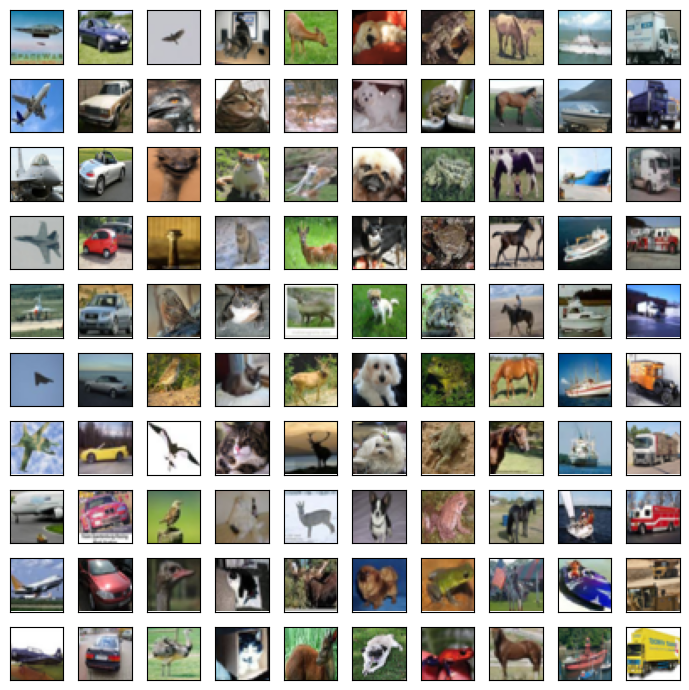

In [2]:
# Create a 20x10 subplot grid
fig, axs = plt.subplots(10, 10, figsize=(7, 7))

# Iterate over each class
for i, c in enumerate(np.unique(y_train)):
    # Select 10 random samples from this class
    idx = np.random.choice(np.where(y_train == c)[0], 10, replace=False)

    # Iterate over the 10 random samples
    for j, idx_j in enumerate(idx):
        # Get the corresponding image
        img = x_train[idx_j]

        # Display the image in the subplot
        axs[j, i].imshow(img)
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

### Step 2: Label conversion

Convert the labels to one-hot encoding.

In [3]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10) # This line is causing the error because y_train is no longer numerical data
y_test = to_categorical(y_test, num_classes=10)


### Step 3: Image normalization

Normalize the images

In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Step 4: Data augmentation

Use image data augmentation if relevant to enhance the diversity of the training data.

In [5]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
# datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Fit the data generator on the training data
# datagen.fit(x_train)

## Creating and training the model

Here we wil start wit the basic model and we´ll start adding diferent layers, hyperparameters etc to see what works best

### Step 1: Defining the model

Define the model architecture

In [6]:
from keras.backend import clear_session # In case it is needed to copy and paste code in another cell
clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 307,114 (1.17 MB)

 Trainable params: 305,962 (1.17 MB)

 Non-trainable params: 1,152 (4.50 KB)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

### Step 2: Model Training

Train the Model: Train the model and show how the accuracy and loss evolve over time using plots.

Use Callbacks: Implement callbacks like EarlyStopping and ModelCheckpoint if necessary.

In [7]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add a Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with validation split
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.25)


# Train the model (for image augmentation)
# history = model.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 149ms/step - accuracy: 0.2250 - loss: 2.6397 - val_accuracy: 0.0952 - val_loss: 2.8228
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3823 - loss: 1.7353 - val_accuracy: 0.0952 - val_loss: 3.0580
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4691 - loss: 1.4843 - val_accuracy: 0.1013 - val_loss: 2.8591
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5269 - loss: 1.3196 - val_accuracy: 0.1634 - val_loss: 2.7542
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5763 - loss: 1.2005 - val_accuracy: 0.2229 - val_loss: 2.3507
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6076 - loss: 1.1194 - val_accuracy: 0.3349 - val_loss: 2.2397
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6356 - loss: 1.0346 - val_accuracy: 0.4796 - val_loss: 1.4897
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6594 - loss: 0.9697 - val_accuracy: 0.5690 -

## Model Evaluation

Evaluate the model using different metrics such as loss and accuracy for training, testing and validation

### Step 1: Loss and Accuracy

Plot the model loss with the cross entropy loss curve and the accuracy curve to check training history and overfitting

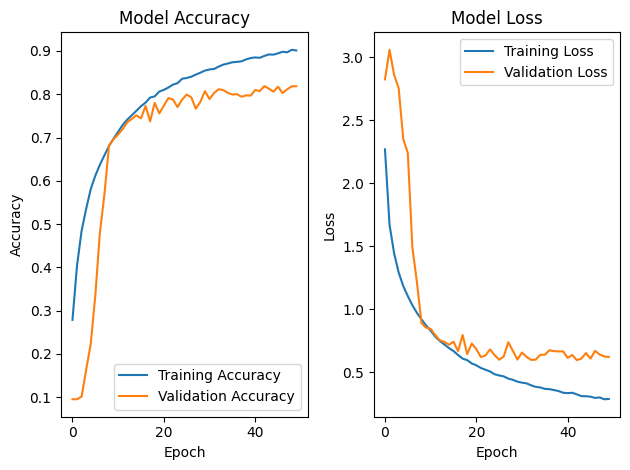

In [8]:
# Plot Cross Entropy Loss curve
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Step 2: Model overall accuracy

Check the model overall accuracy its validation and test accuracy and loss both in the training, testing and validation steps by ploting the training history

In [9]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Get final training metrics
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]

# Get final validation metrics
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f'Training accuracy: {train_acc:.2f}, loss: {train_loss:.2f}')
print(f'Validation accuracy: {val_acc:.2f}, loss: {val_loss:.2f}')
print(f'Test accuracy: {test_acc:.2f}, loss: {test_loss:.2f}')

Training accuracy: 0.90, loss: 0.29
Validation accuracy: 0.82, loss: 0.62
Test accuracy: 0.81, loss: 0.65


### Step 3: Confusion Matrix

Plot the confusion matrix to see how the model is performing in terms of misclassification specially of one class against the others

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


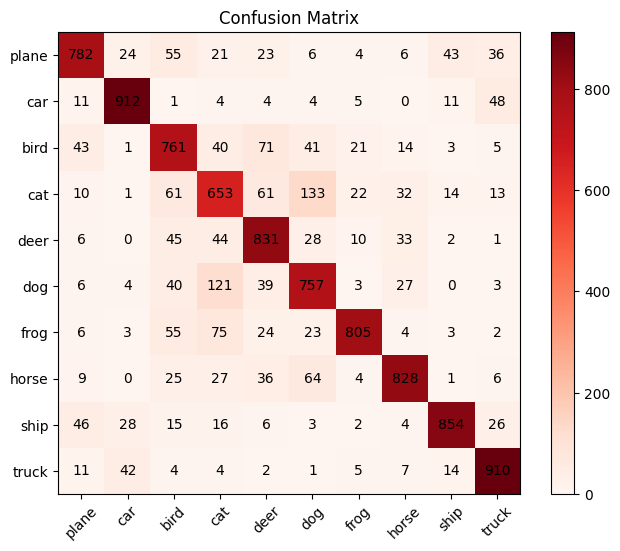

              precision    recall  f1-score   support

       plane       0.84      0.78      0.81      1000
         car       0.90      0.91      0.91      1000
        bird       0.72      0.76      0.74      1000
         cat       0.65      0.65      0.65      1000
        deer       0.76      0.83      0.79      1000
         dog       0.71      0.76      0.73      1000
        frog       0.91      0.81      0.86      1000
       horse       0.87      0.83      0.85      1000
        ship       0.90      0.85      0.88      1000
       truck       0.87      0.91      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [13]:
import seaborn as sns
from sklearn.metrics import classification_report

# Predict the output for the test split
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Use the custom class names as tick labels
plt.xticks(range(len(custom_class_names)), custom_class_names, rotation=45)
plt.yticks(range(len(custom_class_names)), custom_class_names)

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

# Ensure both y_test and y_pred_class are in the same format
y_test_class = np.argmax(y_test, axis=1)

# Display a classification report
print(classification_report(y_test_class, y_pred_class, target_names = custom_class_names)) # Use y_test_class

### Step 4: Plot image prediction

Test on how the model perform on images from dataset. Random samples of images on a 10 x 10 matrix that contains 100 random images already classified by the model.

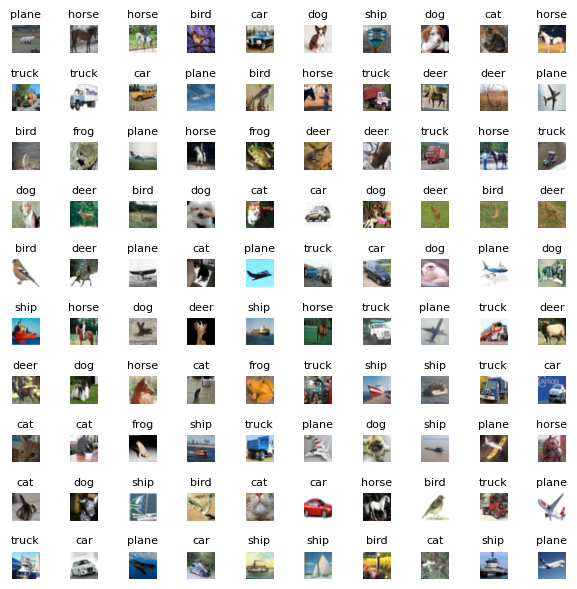

In [14]:
# Select a few examples from the test dataset
num_examples = 100
indices = np.random.choice(x_test.shape[0], num_examples, replace=False)
x_examples = x_test[indices]
y_examples = y_test[indices]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))

# Loop through the examples and display the images and class labels
for i, (x, y) in enumerate(zip(x_examples, y_examples)):
    ax = axes[i // 10, i % 10]
    ax.imshow(x)
    ax.set_title(custom_class_names[np.argmax(y)], fontsize=8)  # Use np.argmax to get the integer index and set fontsize to 8
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

ipywidgets

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Image selection widget
image_selector = widgets.IntSlider(
    value=0,
    min=0,
    max=len(x_test) - 1,
    step=1,
    description='Image Index:',
    style={'description_width': 'initial'}
)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Class")

# Output area to display the results
output = widgets.Output()

# Display widgets
display(image_selector, predict_button, output)

# Function to display the image and prediction results
def predict_image(change):
    with output:
        # Clear previous output
        output.clear_output()

        # Get selected image index
        index = image_selector.value

        # Display the selected image
        plt.imshow(x_test[index])
        plt.title("Selected Image")
        plt.axis('off')
        plt.show()

        # Get the true label and predicted label
        true_label = custom_class_names[np.argmax(y_test[index])]
        image = np.expand_dims(x_test[index], axis=0)  # Add batch dimension
        predicted_probabilities = model.predict(image)
        predicted_class = custom_class_names[np.argmax(predicted_probabilities)]

        # Display the prediction result
        print(f"True Label: {true_label}")
        print(f"Predicted Class: {predicted_class}")

# Connect button click to prediction function
predict_button.on_click(predict_image)

IntSlider(value=0, description='Image Index:', max=9999, style=SliderStyle(description_width='initial'))

Button(description='Predict Class', style=ButtonStyle())

Output()